In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

In [2]:
df = pd.read_csv("training.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()

Shape: (48842, 15)
Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss    

In [4]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

In [5]:
label_encoders = {}

for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
X = df.drop("income", axis=1)
y = df["income"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

test_data = X_test.copy()
test_data["income"] = y_test


test_data.to_csv("test.csv", index=False)
print("test.csv created successfully!")


test.csv created successfully!


In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [13]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [17:56:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
def evaluate_model(model, X_test_data, y_test, model_name):
    
    y_pred = model.predict(X_test_data)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_data)[:,1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None
    
    results = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": auc,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }
    
    return results

In [16]:
results = []

results.append(evaluate_model(log_model, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(dt_model, X_test, y_test, "Decision Tree"))
results.append(evaluate_model(knn_model, X_test, y_test, "KNN"))
results.append(evaluate_model(nb_model, X_test, y_test, "Naive Bayes"))
results.append(evaluate_model(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_model(xgb_model, X_test, y_test, "XGBoost"))

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.814283,0.841913,0.698166,0.441570,0.540984,0.449689
1,Decision Tree,0.807429,0.743392,0.610424,0.616414,0.613404,0.485198
2,KNN,0.818925,0.846963,0.654082,0.571811,0.610186,0.494839
3,Naive Bayes,0.788415,0.839705,0.644366,0.326494,0.433393,0.348036
4,Random Forest,0.846783,0.898786,0.731602,0.603033,0.661125,0.567714
5,XGBoost,0.865355,0.923469,0.770042,0.651204,0.705655,0.622813


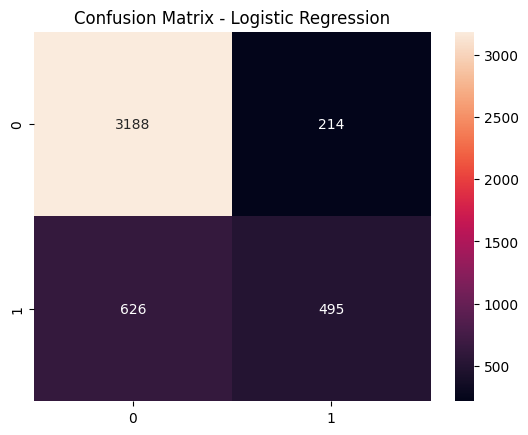

In [17]:
cm = confusion_matrix(y_test, log_model.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [18]:
import joblib
import os

os.makedirs("model", exist_ok=True)
joblib.dump(label_encoders, "model/label_encoders.pkl")
joblib.dump(log_model, "model/log_model.pkl")
joblib.dump(dt_model, "model/dt_model.pkl")
joblib.dump(knn_model, "model/knn_model.pkl")
joblib.dump(nb_model, "model/nb_model.pkl")
joblib.dump(rf_model, "model/rf_model.pkl")
joblib.dump(xgb_model, "model/xgb_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']